In [1]:
import sys
import pandas as pd
import numpy as np
import pylab as pl
import os

In [2]:
filepath = '/teams/DSC180A_FA20_A00/b05vpnxray/group2_data/data'
data = os.listdir(filepath)

In [3]:
len(data)

381

In [4]:
def label_identifyer(x):
    if 'netflix' in x:
        return 'Netflix'
    if 'prime' in x:
        return 'Amazon Prime'
    if 'youtube' in x:
        return 'Youtube'
    else:
        return 'Other'

In [5]:
def table_output_col(df):
    df['output'] = df['Input'].apply(label_identifyer)
    return df

In [6]:
df = pd.DataFrame({"Input": data})
df = table_output_col(df)

In [7]:
df.head()

,Input,output
0,jeq004_netflix_1080p_1x_vpn_mac_clean_20210106...,Netflix
1,jeq004_netflix_1080p_1x_vpn_mac_clean_20210107...,Netflix
2,jeq004_netflix_1080p_1x_vpn_mac_clean_20210105...,Netflix
3,chang_amazonprime_3.csv,Amazon Prime
4,jeq004_netflix_1080p_1x_vpn_mac_clean_20210104...,Netflix


In [8]:
ap_df = df[df['output'] == 'Amazon Prime']
nx_df = df[df['output'] == 'Netflix']
yt_df = df[df['output'] == 'Youtube']

In [9]:
len(ap_df)

100

In [10]:
len(nx_df)

177

In [11]:
len(yt_df)

104

In [12]:
def modify_data(raw_data):
    #we are separating the column "packet sizes"
    new_pksize = []
    for i in raw_data["packet_sizes"]:
        arr = i.split(";")
        for j in arr[:-1]:
            new_pksize.append(j)

    #we are separating the column "packet dir"
    new_pkdir = []
    for i in raw_data["packet_dirs"]:
        arr = i.split(";")
        for j in arr[:-1]:
            new_pkdir.append(j)

    modified_data = pd.DataFrame({'packet_sizes': pd.to_numeric(new_pksize), 'packet_dir': pd.to_numeric(new_pkdir)})
    return modified_data

In [13]:
input_values = []
output_values = []
for i in ap_df['Input'].values:
    
    #print(i)
    df = pd.read_csv(filepath + '/' + i)
    df = modify_data(df)
    values = df['packet_dir'].value_counts(normalize = True)
    input_values.append(values[1])
    output_values.append(values[2])
    
print("Amazon Prime")
print('input values mean: ' + str(np.mean(input_values)))
print('output values mean: ' + str(np.mean(output_values)))

    

Amazon Prime
input values mean: 0.3920891843648158
output values mean: 0.6079108156351841


In [14]:
input_values = []
output_values = []
for i in nx_df['Input'].values:
    
    #print(i)
    df = pd.read_csv(filepath + '/' + i)
    df = modify_data(df)
    values = df['packet_dir'].value_counts(normalize = True)
    input_values.append(values[1])
    output_values.append(values[2])
    
print("Netflix")
print('input values mean: ' + str(np.mean(input_values)))
print('output values mean: ' + str(np.mean(output_values)))

  

Netflix
input values mean: 0.2973877695731733
output values mean: 0.7026122304268266


In [15]:
input_values = []
output_values = []
for i in yt_df['Input'].values:
    
    #print(i)
    df = pd.read_csv(filepath + '/' + i)
    df = modify_data(df)
    values = df['packet_dir'].value_counts(normalize = True)
    input_values.append(values[1])
    output_values.append(values[2])
 
print("Youtube")
print('input values mean: ' + str(np.mean(input_values)))
print('output values mean: ' + str(np.mean(output_values)))

  

Youtube
input values mean: 0.33369900582293827
output values mean: 0.6663009941770617


## plotting the first 10/provider- frequency of packet sizes 

In [24]:
def pktdir_vs_pktsze_int(modified_data):
    modified_data[modified_data["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
    modified_data[modified_data["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
   # pl.title('Packet Directions vs Packet Size: internet browsing data with VPN')
    pl.xlabel('Packet Size')
    pl.ylabel('Frequency')
    pl.legend(["1->2", "2->1"])
    pl.show()

## General pattern for Amazon Prime

chang_amazonprime_3.csv


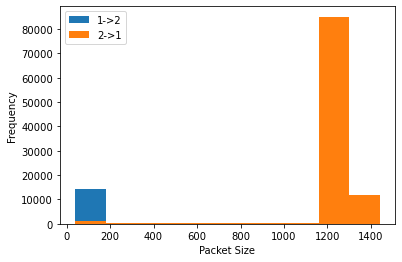

chang_amazonprime_4.csv


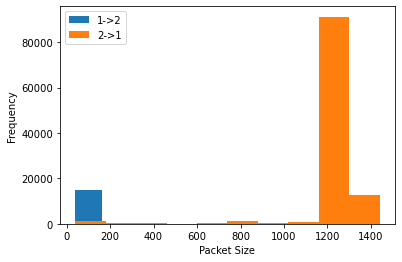

chang_amazonprime_24.csv


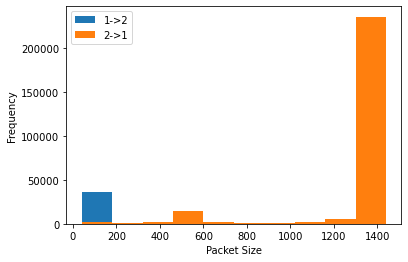

chang_amazonprime_23.csv


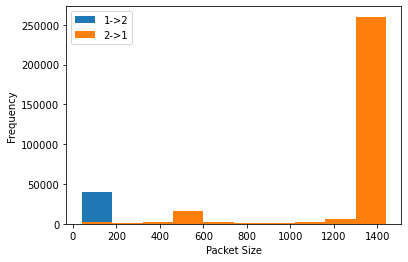

arv020_amazonprime_1080p_1x_vpn_mac_clean_1.csv


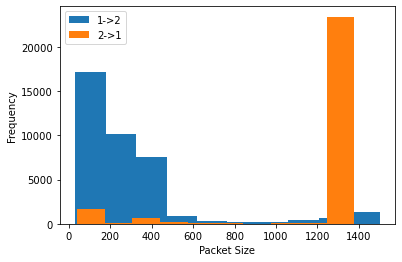

arv020_amazonprime_1080p_1x_vpn_mac_clean_46.csv


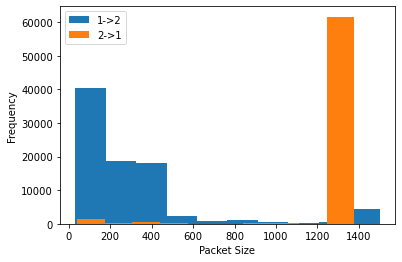

chang_amazonprime_16.csv


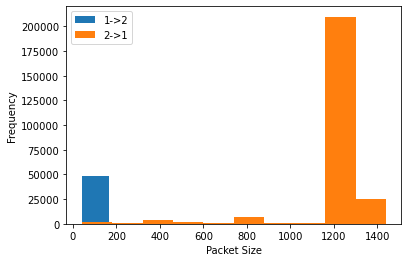

chang_amazonprime_11.csv


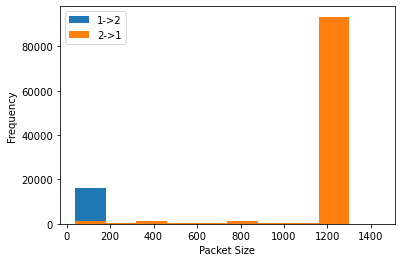

arv020_amazonprime_1080p_1x_vpn_mac_clean_6.csv


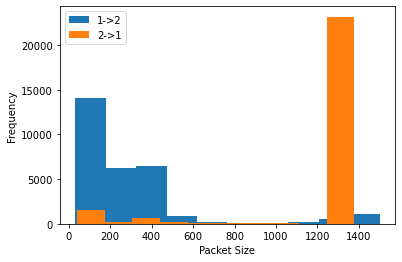

arv020_amazonprime_1080p_1x_vpn_mac_clean_41.csv


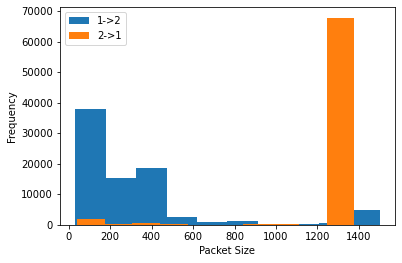

In [26]:
for i in ap_df['Input'][0:10]:
    print(i)
    df = pd.read_csv(filepath + '/' + i)
    df = modify_data(df)
    pktdir_vs_pktsze_int(df)


## General Pattern for Netflix

jeq004_netflix_1080p_1x_vpn_mac_clean_20210104-8.csv


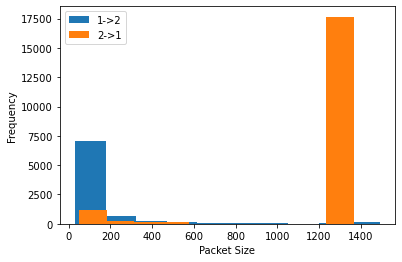

jeq004_netflix_1080p_1x_vpn_mac_clean_20210106-10.csv


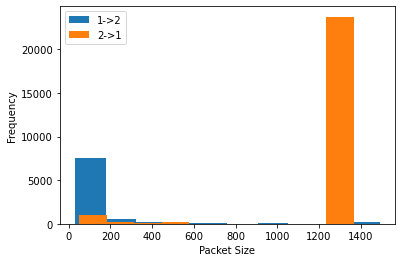

jeq004_netflix_1080p_1x_vpn_mac_clean_20210104-33.csv


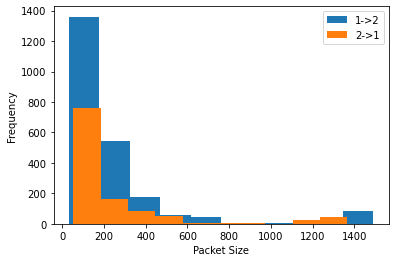

jeq004_netflix_1080p_1x_vpn_mac_clean_20210108-28.csv


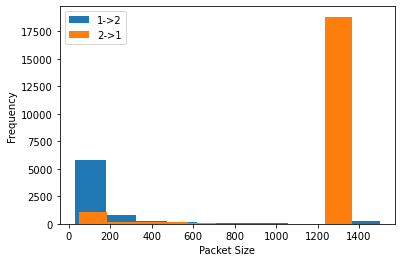

jeq004_netflix_1080p_1x_vpn_mac_clean_20210106-17.csv


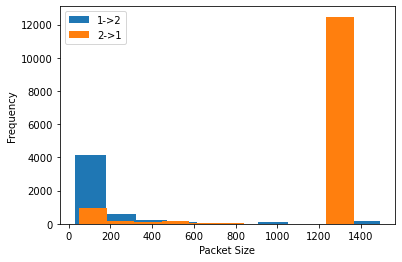

jeq004_netflix_1080p_1x_vpn_mac_clean_20210110-19.csv


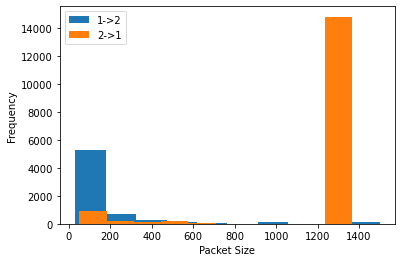

jeq004_netflix_1080p_1x_vpn_mac_clean_20210104-34.csv


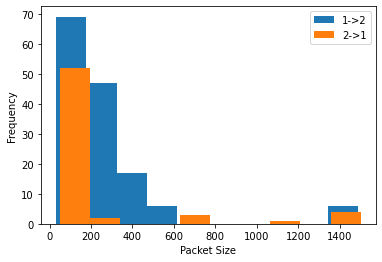

jeq004_netflix_1080p_1x_vpn_mac_clean_20210106-3.csv


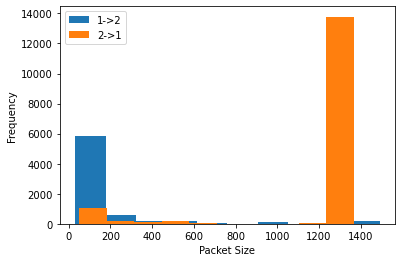

jeq004_netflix_1080p_1x_vpn_mac_clean_20210108-21.csv


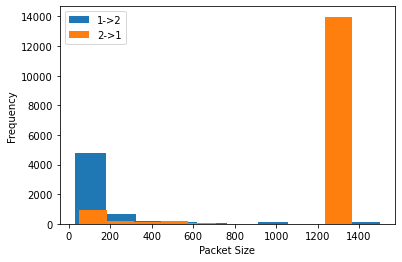

jeq004_netflix_1080p_1x_vpn_mac_clean_20210106-19.csv


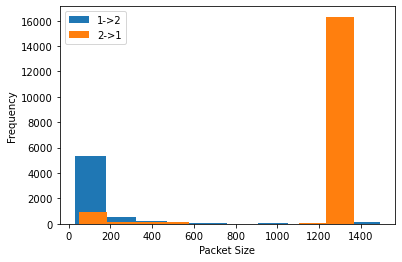

In [30]:
for i in nx_df['Input'][90:100]:
    print(i)
    df = pd.read_csv(filepath + '/' + i)
    df = modify_data(df)
    pktdir_vs_pktsze_int(df)


## General Pattern for Youtube

jeq004_youtube_1080p_1x_vpn_mac_clean_20210109-2.csv


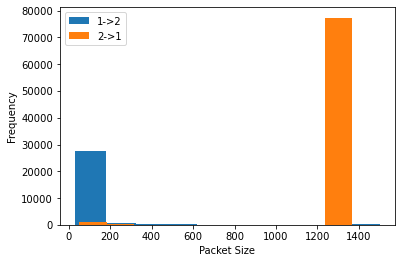

jeq004_youtube_1080p_1x_vpn_mac_clean_20210109-5.csv


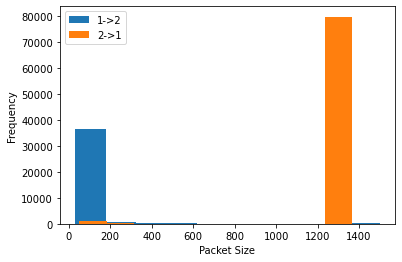

mhrowlan-youtube-1x-vpn-mac-clean-20210108zz.csv


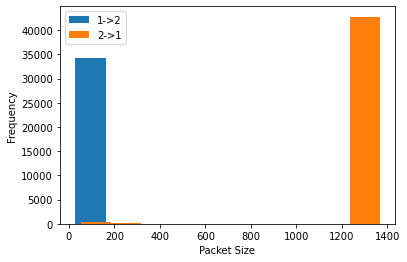

chang_youtube_7.csv


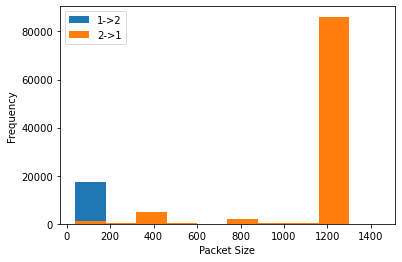

chang_youtube_19.csv


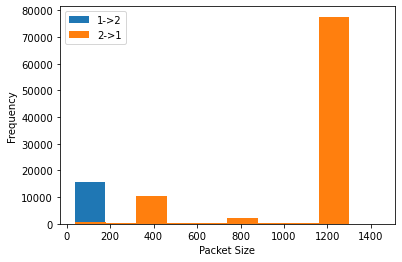

mhrowlan-youtube-1x-vpn-mac-clean-20210108pp.csv


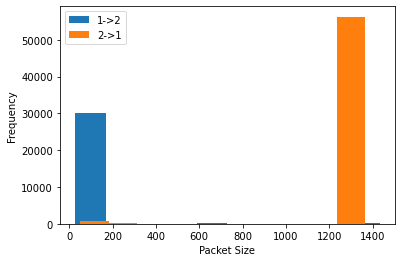

chang_youtube_17.csv


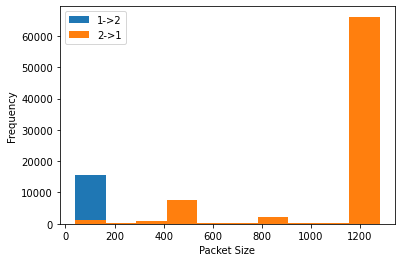

mhrowlan-youtube-1x-vpn-mac-clean-20210108nn.csv


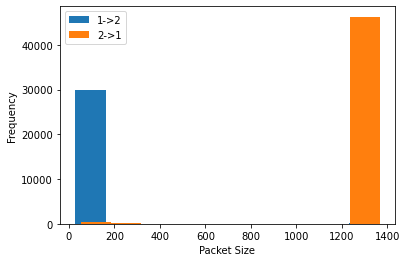

mhrowlan-youtube-1x-vpn-mac-clean-20210108dd.csv


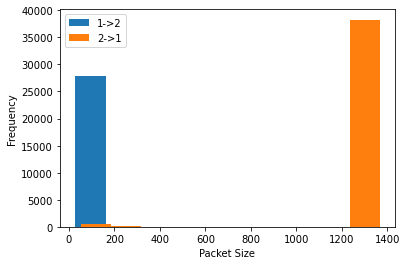

chang_youtube_9.csv


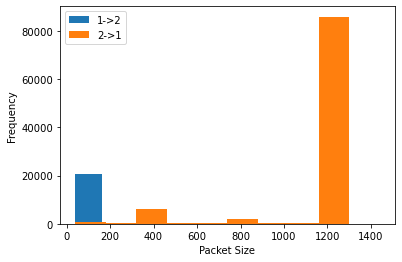

In [28]:
for i in yt_df['Input'][0:10]:
    print(i)
    df = pd.read_csv(filepath + '/' + i)
    df = modify_data(df)
    pktdir_vs_pktsze_int(df)
